In [ ]:
# Problema: Classificar se uma pessoa compraria um produto com base na idade, renda e no sexo.
# importação das bibliotecas
import pandas as pd

In [5]:
df = pd.read_csv('C:/Users/dsadm/Desktop/repositorio/inteligencia_artificial_2025/aula_9/Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# Criação de um dicionário para substituir o nome de cada coluna
dicionario = {
    'User ID': 'Usuario', 'Gender': 'Genero', 'Age': 'Idade', 'EstimatedSalary': 'Salario Estimado',
    'Purchased': 'Comprou'
}

In [9]:
df.rename(columns=dicionario,inplace=True) # renomação das colunas

In [11]:
df.head()

,Usuario,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
# Importação das bibliotecas necessárias para análise de dados
import matplotlib.pyplot as plt
from sklearn.svm import SVC # importação, da biliblioteca SVM o modelo SVC
from sklearn.preprocessing import StandardScaler # Normalização dos dados
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from matplotlib.colors import ListedColormap 

In [14]:
# Seleciona as colunas do dataframe
x = df.iloc[:,[2,3]].values # pega os valores da primeira coluna até os da coluna 3
y = df.iloc[:,[-1]].values # pega os dados da última coluna do dataframe

In [ ]:
x

In [ ]:
y

In [19]:
# importação das biliotecas para divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split # importação do método train teste split

In [25]:
# divisão dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste=train_test_split(x,y,test_size=0.3,random_state=3)

In [28]:
# normalização dos dados com Standscaler
sc = StandardScaler() # armazena o Stand Scaller na variável sc

In [29]:
# Normalização dos dados x_treino e x_teste
x_treino=sc.fit_transform(x_treino)
x_teste=sc.fit_transform(x_teste)

In [31]:
# criação do algoritmo de ML - Machine Learning SVM
algoritmo = SVC(kernel='linear',random_state=3)

In [32]:
# trein
algoritmo.fit(x_treino,y_treino)

C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
# realização das previsões
y_prev=algoritmo.predict(x_teste)

In [ ]:
# Visualização dos dados da variável que armazena as previsões
y_prev

In [38]:
# exibição do x_teste
x_teste

array([[ 0.88051148,  0.12484894],
       [ 0.98171969, -1.25765908],
       [ 2.19621829, -1.14480128],
       [-1.75090214, -0.58051229],
       [-1.04244462,  0.54806568],
       [ 0.27326218,  0.23770674],
       [ 1.38655256, -1.31408798],
       [-1.44727749, -0.60872674],
       [ 0.67809505, -0.86265679],
       [-1.04244462, -1.48337467],
       [ 0.3744704 , -0.27015335],
       [ 0.17205397, -0.77801344],
       [ 0.88051148,  0.51985123],
       [-0.2327789 , -0.4676545 ],
       [-1.14365284, -1.06015793],
       [-1.34606927, -1.42694577],
       [-0.73881998, -0.58051229],
       [-1.34606927,  0.40699343],
       [-0.03036246,  1.90235924],
       [ 0.27326218, -0.27015335],
       [-0.53640354,  0.46342233],
       [-0.33398711, -1.25765908],
       [-0.84002819,  0.29413563],
       [ 0.47567862, -0.12908111],
       [-0.43519533,  1.22521246],
       [-0.63761176, -0.32658225],
       [ 0.47567862, -0.43944005],
       [ 1.48776077,  2.26914708],
       [ 0.3744704 ,

In [37]:
# aplicação da transformação inversa dos dados
x_teste_padrao = sc.inverse_transform(x_teste)

In [ ]:
# exibição do x_teste_padrao
x_teste_padrao

In [40]:
# geração da matriz de confusão
cm = confusion_matrix(y_teste,y_prev)
cm

array([[72,  6],
       [13, 29]])

In [ ]:
# cálculo das métricas
acc = accuracy_score(y_teste,y_prev)

# acc = (VP + VN) / (VP + VB + FP + FN)
acc

0.8416666666666667

In [43]:
# precisão
prec = precision_score(y_teste,y_prev)

# prec = VP / (VP + FP)
prec

0.8285714285714286

In [44]:
# Metrica Recall
# recal = VP / (VP + FN)
recall = recall_score(y_teste,y_prev)
recall

0.6904761904761905

In [ ]:
# Metrica F1_score
# F1score = 2 * (precision * recall) / (precision*recall)
f1score = f1_score(y_teste,y_prev)
f1score

0.7532467532467533

In [46]:
# importação da biblioteca seaborn
import seaborn as sns

Text(70.72222222222221, 0.5, 'Previsão')

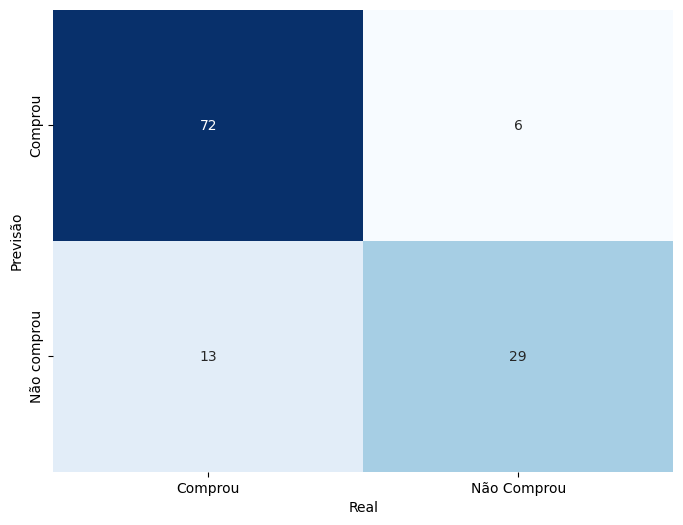

In [55]:
plt.figure(figsize=(8,6)) # definição do tamanho da figura
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Comprou','Não Comprou'],
            yticklabels=['Comprou','Não comprou'])
plt.xlabel('Real')
plt.ylabel('Previsão')

In [57]:
# plotagem do gráfico com os dados
import numpy as np
_x,_y = x_treino,y_treino.ravel()
_x,_y = x_treino,y_treino
x1,x2 = np.meshgrid(np.arange(start=_x[:,0]).min()-1,stop=_x[:,0].max()+1,step=0.01),np.arange(start=_x[:,1].min()-1,stop=_x[:1].max()+1,step=0.01)
plt.countourf(x1,x2,algoritmo.predict(np.array([x1.ravel(),x2.ravel()]).t).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red', 'blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.mazx)
for i,j in enumerate(np.unique(_y)):
    plt.scatter(_x[_y==j,0],_x[_y==j,1],c=ListedColormap(('gray','black'))(i),label=j)
plt.title('SVM - Dados de Treinameto')
plt.xlabel('Idade')
plt.ylabel('Salário Anual Estimado')
plt.legend()
plt.show()

TypeError: arange() requires stop to be specified.

In [ ]:
# plotagem do gráfico com os dados
import numpy as np
_x,_y = x_teste,y_teste.ravel()
_x,_y = x_treino,y_treino
x1,x2 = np.meshgrid(np.arange(start=_x[:,0]).min()-1,stop=_x[:,0].max()+1,step=0.01),np.arange(start=_x[:,1].min()-1,stop=_x[:1].max()+1,step=0.01)
plt.countourf(x1,x2,algoritmo.predict(np.array([x1.ravel(),x2.ravel()]).t).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red', 'blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.mazx)
for i,j in enumerate(np.unique(_y)):
    plt.scatter(_x[_y==j,0],_x[_y==j,1],c=ListedColormap(('gray','black'))(i),label=j)
plt.title('SVM - Dados de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Anual Estimado')
plt.legend()
plt.show()

TypeError: arange() requires stop to be specified.

In [59]:
# aplicação da transformação nos dados
x = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
# divisão da base de dados
x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,test_size=0.25,random_state=3)
#Padronização dos dados
sc = StandardScaler()
x_treino=sc.fit_transform(x_treino)
x_teste=sc.fit_transform(x_teste)
algoritmo=SVC(kernel='linear',random_state=3)
algoritmo.fit(x_treino,y_treino)
#previsão dos resultados
algoritmo.predict(x_teste)
# inversão dos dados para teste
x_teste_inverse = sc.inverse_transform(x_teste)
#Visualização dos resultados dos dados de teste
plt.figure(figsize=)
 

SyntaxError: expected argument value expression (3368421039.py, line 17)